## 线性回归案例：预测自行车流量

In [1]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [2]:
import pandas as pd

# 设置日期为索引
counts = pd.read_csv('./input/FremontBridge.csv', index_col='Date', parse_dates=True)
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-03-31 23:00:00,6.0,10.0
2019-03-31 22:00:00,7.0,14.0
2019-03-31 21:00:00,18.0,15.0
2019-03-31 20:00:00,26.0,31.0
2019-03-31 19:00:00,30.0,58.0


In [3]:
# 设置日期为索引
weather = pd.read_csv('./input/BicycleWeather.csv', index_col='DATE', parse_dates=True)
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [29]:
# 计算每一天的自行车流量的总和，将结果放到一个新的 DataFrame 中：
daily = counts.resample('d').sum()
daily.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03,1760.0,1761.0
2012-10-04,1708.0,1767.0
2012-10-05,1558.0,1590.0
2012-10-06,1080.0,926.0
2012-10-07,1191.0,951.0


In [30]:
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns
daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


在之前的分析中，我们发现同一周内每一天的模式都是不一样的。因此，我们在数据中加上 7 列 0~1 值表示星期几。

In [31]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [32]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


我们觉得骑车人数在节假日也有所变化。因此，再增加一列表示当天是否为节假日：

In [33]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
holidays

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21',
               '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02',
               '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25',
               '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01'],
              dtype='datetime64[ns]', freq=None)

In [34]:
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [35]:
daily['holiday'].fillna(0, inplace=True)

In [36]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


我们还认为白昼时间也会影响骑车人数。因此，用标准的天文计算来添加这列信息。

In [41]:
import numpy as np

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """计算指定日期的白昼时间"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(
        np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

In [42]:
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs
Date,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208


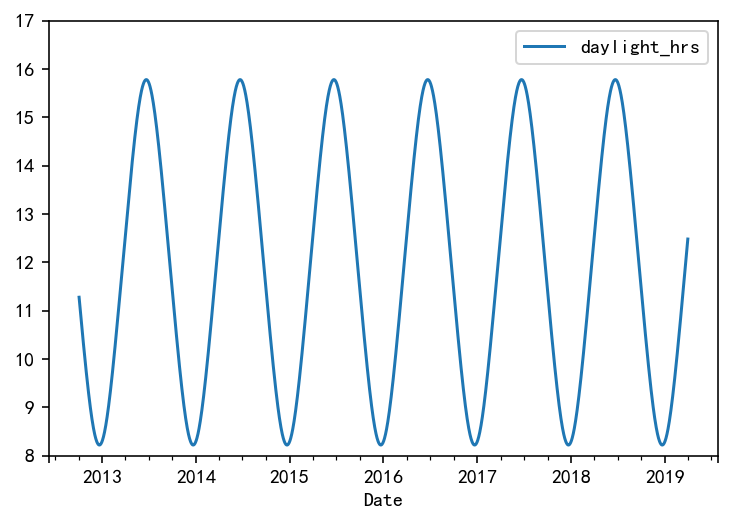

In [43]:
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)
plt.show()

我们还可以增加每一天的平均气温和总降雨量。除了降雨量的数值之外，再增加一个标记 表示是否下雨（是否降雨量为 0）。

In [45]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [46]:
# 温度是按照1/10摄氏度统计的，首先转换为摄氏度
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

In [47]:
# 降雨量也是按照1/10mm统计的，转化为英寸
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

In [48]:
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0


最后，增加一个从 1 开始递增的计数器，表示一年已经过去了多少天。这个特征可以让我 们看到每一年自行车流量的增长或减少：



In [49]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


有了这些数据之后，就可以选择需要使用的列，然后对数据建立线性回归模型。我们不在 模型中使用截距，而是设置 fit_intercept = False，因为每一天的总流量（Total 字段） 基本上可以作为当天的截距。

其实此线性回归模型使用截距， 即设置 `fit_intercept = True`，拟合结果也不变。

In [51]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2371 entries, 2012-10-03 to 2019-03-31
Freq: D
Data columns (total 14 columns):
Total           2371 non-null float64
Mon             2371 non-null float64
Tue             2371 non-null float64
Wed             2371 non-null float64
Thu             2371 non-null float64
Fri             2371 non-null float64
Sat             2371 non-null float64
Sun             2371 non-null float64
holiday         2371 non-null float64
daylight_hrs    2371 non-null float64
PRCP            1064 non-null float64
Temp (C)        1064 non-null float64
dry day         1064 non-null float64
annual          2371 non-null float64
dtypes: float64(14)
memory usage: 277.9 KB


In [52]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

In [53]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

In [55]:
X.head()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,dry day,Temp (C),annual
Date,,,,,,,,,,,,,
2012-10-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,1.0,13.35,0.000000
2012-10-04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,1.0,13.60,0.002740
2012-10-05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,1.0,15.30,0.005479
2012-10-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,1.0,15.85,0.008219
2012-10-07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,1.0,15.85,0.010959


In [57]:
y.head()

Date
2012-10-03    3521.0
2012-10-04    3475.0
2012-10-05    3148.0
2012-10-06    2006.0
2012-10-07    2142.0
Freq: D, Name: Total, dtype: float64

In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

In [60]:
daily['predicted'] = model.predict(X)
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,predicted
Date,,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000,3463.400275
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740,3361.947831
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479,3160.933823
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219,1908.094174
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959,1870.448616


对比自行车真实流量（ Total 字段）与预测流量（ predicted 字段）。

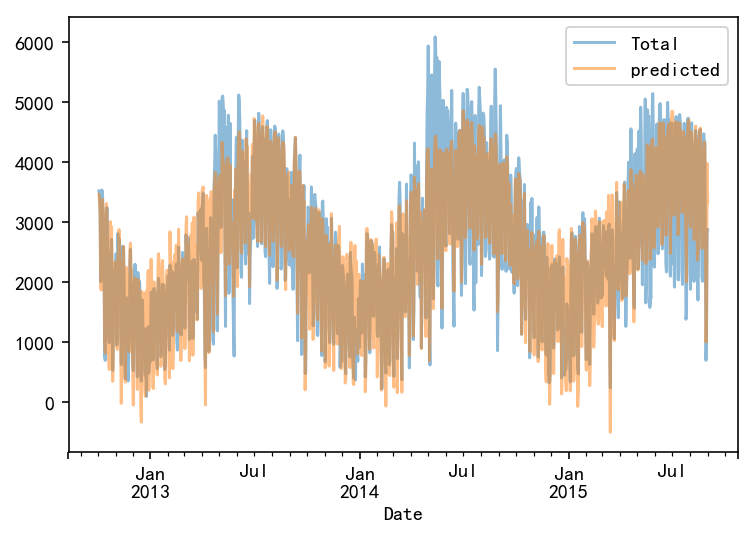

In [62]:
daily[['Total', 'predicted']].plot(alpha=0.5)

In [63]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              486.131350
Tue              591.482531
Wed              573.922236
Thu              463.606710
Fri              159.228940
Sat            -1122.053116
Sun            -1152.318651
holiday        -1187.401381
daylight_hrs     128.851511
PRCP            -664.834882
dry day          547.698592
Temp (C)          65.162791
annual            26.942713
dtype: float64

如果不对这些数据的不确定性进行评估，那么它们很难具有解释力。可以用自举重采样方法快速计算数据的不确定性：

In [64]:
from sklearn.utils import resample

np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

有了估计误差之后，再来看这些结果：

In [65]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon            486.0   34.0
Tue            591.0   35.0
Wed            574.0   35.0
Thu            464.0   35.0
Fri            159.0   34.0
Sat          -1122.0   33.0
Sun          -1152.0   31.0
holiday      -1187.0  163.0
daylight_hrs   129.0    9.0
PRCP          -665.0   62.0
dry day        548.0   33.0
Temp (C)        65.0    4.0
annual          27.0   18.0
